# Setup

In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: rich_clust
python version: 3.9.12


In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import natsort

import torch
# from kymatio.torch import Scattering2D

import gc
import time
import functools
import multiprocessing as mp


In [3]:
tic = time.time()
toc = {}
toc['start'] = time.time() - tic

In [4]:
dir_save = '/home/rich/Desktop/'

used for valerio data

In [5]:
# params = {
#     'paths': {
#         'dir_github': r'/media/rich/Home_Linux_partition/github_repos/',  ## directory where ROICat is
#         'dir_allOuterFolders': r"/media/rich/bigSSD/other lab data/Harnett_lab/ROI_Tracking/Vincent_Valerio/20220117_email/Proximal_Dendrites",  ## directory where directories containing below 'pathSuffixTo...' are
#         'pathSuffixToStat': 'stat.npy',  ## path suffix to where the stat.npy file is
#         'pathSuffixToOps': 'ops.npy',  ## path suffix to where the ops.npy file is
#         'dir_save': r'/home/rich/Desktop/',  ## default: None. Directory to save output file to. If None then saves in dir_allOuterFolders.
#         'filenamePrefix_save': None,  ##  default: None. Filename prefix to save results to. If None then just uses the dir_allOuterFolders.name.
#     },
#     'importing': {
#         'data_verbose': True,  ## default: True. Whether to print out data importing information
#         'out_height_width': [72, 72],  ## default: [36,36]. Height and width of small cropped output images of each ROI. Check how large your ROIs are in pixels.
#         'max_footprint_width': 1025,  ## default: 1025. Maximum length of a spatial footprint. If you get an error during importing, try increasing this value.
#         'type_meanImg': 'meanImgE',  ## default: 'meanImgE'. Type of mean image to use for normalization. This is just a field in the ops.npy file.
#         'um_per_pixel': 1.0,  ## default: 1.0. Number of microns per pixel for the imaging dataset. Doesn't need to be exact. Used for resizing the ROIs. Check the images of the resized ROIs to tweak.
#         'new_or_old_suite2p': 'new',  ## default: 'new'. If using suite2p, this specifices whether the stat.npy file is in the old MATLAB format or new Python format.
#         'images': None,  ## default: None. Set to None if you want to use the images extracted from Suite2p
#         'import_workers': -1, ## default: -1. Number of workers to use for importing. Set to -1 to use all available workers.
#     },
#     'alignment': {
#         'do_phaseCorrReg': True,  ## default: True. If you are having issues with alignment due to big movements of the FOV. Try setting this to False.
#         'session_template': 0.5,  ## default: 0.5. Which session to use as a registration template. If input is float (ie 0.0, 0.5, 1.0, etc.), then it is the fractional position of the session to use; if input is int (ie 1, 2, 3), then it is the index of the session to use (0-indexed)
#         'phaseCorr': {
#             'freq_highPass': 0.01,  ## default: 0.01. Spatial frequency upper-bound cut-off to use for phase correlation. Units in fraction of the height of the FOV. Spatial frequencies correlations higher than this will be set to zero.
#             'freq_lowPass': 0.3,  ## default: 0.3. Spatial frequency lower-bound cut-off to use for phase correlation. Units in fraction of the height of the FOV. Spatial frequencies correlations lower than this will be set to zero.
#         },
#         'method': 'createOptFlow_DeepFlow',  ## default: 'createOptFlow_DeepFlow'. Method to use for creating optical flow.
#         'kwargs_method': None,  ## default: None. Keyword arguments to pass to the cv2 optical flow method.
#         'use_CLAHE': False,  ## default: False. Whether or not to use 'Contrast Limited Adaptive Histogram Equalization'. Useful if params['importing']['type_meanImg'] is not a contrast enhanced image (like 'meanImgE' in Suite2p)
#         'return_sparse': True,  ## default: True. Whether to return a sparse matrix (True) or a dense matrix (False).
#         'normalize': True,  ## default: True. If True, normalize the spatial footprints to have a sum of 1.
#     },
#     'blurring': {
#         'kernel_halfWidth': 5.0,  ## default: 2.0. Half-width of the cosine kernel used for blurring. Set value based on how much you think the ROIs move from session to session.
#         'plot_kernel': False,  ## default: False. Whether to plot the kernel used for blurring.
#     },
#     'ROInet': {
#         'device': 'cuda:0',  ## default: 'cuda:0'. Device to use for ROInet. Recommend using a GPU.
#         'hash_dict_true': {
#             'params': ('params.json', '68cf1bd47130f9b6d4f9913f86f0ccaa'),
#             'model': ('model.py', '61c85529b7aa33e0dfadb31ee253a7e1'),
#             'state_dict': ('ConvNext_tiny__1_0_best__simCLR.pth', '3287e001ff28d07ada2ae70aa7d0a4da'),
#         },
#         'dir_networkFiles': '/home/rich/Downloads/ROInet',  ## local directory where network files are stored
#         'download_from_gDrive': 'check_local_first',  ## default: 'check_local_first'. Whether to download the network files from Google Drive or to use the local files.
#         'gDriveID': '1D2Qa-YUNX176Q-wgboGflW0K6un7KYeN',  ## default: '1FCcPZUuOR7xG-hdO6Ei6mx8YnKysVsa8'. Google Drive ID of the network files.
#         'forward_pass_version': 'latent', # default: 'latent'. Leave as 'latent' for most things. Can be 'latent' (full pass through network), 'head' (output of the head layers), or 'base' (pass through just base layers)
#         'verbose': True,  ## default: True. Whether to print out ROInet information.
#         'pref_plot': False,  ## default: False. Whether to plot the ROI and the normalized ROI.
#         'batchSize_dataloader': 8,  ## default: 8. Number of images to use for each batch.
#         'pinMemory_dataloader': True,  ## default: True. Whether to pin the memory of the dataloader.
#         'persistentWorkers_dataloader': True,  ## default: True. Whether to use persistent workers for the dataloader.
#         'prefetchFactor_dataloader': 2,  ## default: 2. Number of prefetch factors to use for the dataloader.
#     },
#     'SWT': {
#         'kwargs_Scattering2D': {'J': 2, 'L': 2},  ## default: {'J': 2, 'L': 2}. Keyword arguments to pass to the kymatio Scattering2D function.
#         'device': 'cuda:0',  ## default: 'cuda:0'. Device to use for SWT. Recommend using a GPU.
#     }, 
#     'similarity': {
#         'spatialFootprint_maskPower': 0.8,  ## default: 1.0. This determines the power to take the ROI mask images to. Higher for more dependent on brightness, lower for more dependent on binary overlap.
#         'n_workers': -1,  ## default: -1. Number of workers to use for similarity. Set to -1 to use all available workers.
#         'block_height': 128,  ## default: 64. Maximum height of the FOV block bins to use for pairwise ROI similarity calculations. Use smaller values (16-64) if n_sessions is large (<12), else keep around (64-128)
#         'block_width': 128,  ## default: 64. Maximum width of the FOV block bins to use for pairwise ROI similarity calculations. Use smaller values (16-64) if n_sessions is large (<12), else keep around (64-128)
#         'algorithm_nearestNeigbors_spatialFootprints': 'brute',  ## default: 'brute'. Algorithm to use for nearest neighbors.
#         'verbose': True,  ## default: True. Whether to print out similarity information.
#         'normalization': {
#             'k_max': 4000,  ## default: 4000. Maximum kNN distance to use for building a distribution of pairwise similarities for each ROI.
#             'k_min': 150,  ## default: 150. Set around n_sessions*10. Minimum kNN distance to use for building a distribution of pairwise similarities for each ROI. 
#             'algo_NN': 'kd_tree',  ## default: 'kd_tree'. Algorithm to use for the nearest neighbors search across positional distances of different ROIs center positions. 'kd_tree' seems to be fastest. See sklearn nearest neighbor documentation for details.
#             'device': 'cuda:0',  ## default: 'cpu'. Device to use for the cosine similarity comparisons. Pytorch device.
#         },
#     },
#     ## Cluster
#     'clustering': {
#         'plot_pref': True,
#         'auto_pruning':{
#             'n_bins': 50,  ## default: 50. Number of bins to use for estimating the distributions for 'different' and 'same' pairwise similarities
#             'find_parameters_automatically': True,  ## default: True. Use optuna automatic parameter searching to find the best values for 'kwargs_makeConjunctiveDistanceMatrix'
#             'n_jobs': -1, ## default: 2. Number of jobs to use for the optuna parameter search. Large values or -1 can result in high memory usage.
#             'kwargs_findParameters': {
#                 'n_patience': 100,
#                 'tol_frac': 0.05,
#                 'max_trials': 350,
#                 'max_duration': 60*10,
#                 'verbose': False,
#             },
#             'bounds_findParameters': {
#                 'power_SF': (0.3, 2),
#                 'power_NN': (0.2, 2),
#                 'power_SWT': (0.1, 1),
#                 'p_norm': (-5, 5),
#                 'sig_NN_kwargs_mu': (0, 0.5),
#                 'sig_NN_kwargs_b': (0.05, 2),
#                 'sig_SWT_kwargs_mu': (0, 0.5),
#                 'sig_SWT_kwargs_b': (0.05, 2),
#             },
#         },
#         'method': 'auto',  ## default: 'auto'. Can be 'hungarian', 'hdbscan', or 'auto'. If 'auto', then if n_sessions >=8 'hdbscan' will be used.
#         'hdbscan':{  ## Used only if 'method' is 'hdbscan'
#             'min_cluster_size': 2,  ## default: 2. Best practice is to keep at 2 because issues can occur otherwise. Just manually throw out clusters with fewer ROIs if needed.
#             'alpha': 0.999,  ## default: 0.999. Use slightly smaller values (~0.8) if you want bigger less conservative clusters. See hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#             'd_clusterMerge': None,  ## default: None. Distance (mixed conjunctive distance) at which all samples less than this far apart are joined in clusters. If None, then set to mean + 1.0 std of the distribution. See 'cluster_selection_epsilon' in hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#             'cluster_selection_method': 'leaf',  ## default: 'leaf'. 'leaf' is better for smaller homogeneous clusters, 'eom' is better for larger clusters of various densities. See hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
#             'split_intraSession_clusters': True,  ## default: True. Splits up clusters with multiple ROIs from the same session into multiple clusters.
#             'd_step': 0.03,  ## default: 0.03. Size of steps to take when splitting clusters with multiple ROIs from the same session. Smaller values give higher quality clusters.
#             'discard_failed_pruning': True,  ## default: Failsafe. If the splitting doesn't work for whatever reason, then just set all violating clusters to label=-1.
#             'n_iter_violationCorrection': 5,  ## default: 5. Number of times to iterate a correcting process to improve clusters. Warning: This can increase run time linearly for large datasets. Typically converges after around 5 iterations. If n_sessions is large (>30), consider increasing.
#         },
#         'hungarian': {
#             'thresh_cost': 0.95, ## default: 0.95. Threshold distance at which all clusters larger than this are discarded. Note that typically no change will occur after values > d_cutoff.
#         },
#     },
# }

In [6]:
params = {
    'paths': {
        'dir_github': r'/media/rich/Home_Linux_partition/github_repos/',  ## directory where ROICat is
        'dir_allOuterFolders': r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029",  ## directory where directories containing below 'pathSuffixTo...' are
        'pathSuffixToStat': 'stat.npy',  ## path suffix to where the stat.npy file is
        'pathSuffixToOps': 'ops.npy',  ## path suffix to where the ops.npy file is
        'dir_save': r'/home/rich/Desktop/',  ## default: None. Directory to save output file to. If None then saves in dir_allOuterFolders.
        'filenamePrefix_save': None,  ##  default: None. Filename prefix to save results to. If None then just uses the dir_allOuterFolders.name.
    },
    'importing': {
        'data_verbose': True,  ## default: True. Whether to print out data importing information
        'out_height_width': [72, 72],  ## default: [36,36]. Height and width of small cropped output images of each ROI. Check how large your ROIs are in pixels.
        'max_footprint_width': 1025,  ## default: 1025. Maximum length of a spatial footprint. If you get an error during importing, try increasing this value.
        'type_meanImg': 'mimg',  ## default: 'meanImgE'. Type of mean image to use for normalization. This is just a field in the ops.npy file.
        'um_per_pixel': 1.0,  ## default: 1.0. Number of microns per pixel for the imaging dataset. Doesn't need to be exact. Used for resizing the ROIs. Check the images of the resized ROIs to tweak.
        'new_or_old_suite2p': 'old',  ## default: 'new'. If using suite2p, this specifices whether the stat.npy file is in the old MATLAB format or new Python format.
        'images': None,  ## default: None. Set to None if you want to use the images extracted from Suite2p
        'import_workers': -1, ## default: -1. Number of workers to use for importing. Set to -1 to use all available workers.
    },
    'alignment': {
        'do_phaseCorrReg': True,  ## default: True. If you are having issues with alignment due to big movements of the FOV. Try setting this to False.
        'session_template': 0.5,  ## default: 0.5. Which session to use as a registration template. If input is float (ie 0.0, 0.5, 1.0, etc.), then it is the fractional position of the session to use; if input is int (ie 1, 2, 3), then it is the index of the session to use (0-indexed)
        'use_CLAHE': True,  ## default: False. Whether or not to use 'Contrast Limited Adaptive Histogram Equalization'. Useful if params['importing']['type_meanImg'] is not a contrast enhanced image (like 'meanImgE' in Suite2p)
        'CLAHE_nGrid': 15,  ## default 10. Unsed if 'use_CLAHE' is False. Defines how many blocks to split the FOV into to normalize the local contrast. See openCV's clahe function. Larger means more CLAHE.
        'phaseCorr': {
            'freq_highPass': 0.0,  ## default: 0.01. Spatial frequency upper-bound cut-off to use for phase correlation. Units in fraction of the height of the FOV. Spatial frequencies correlations higher than this will be set to zero.
            'freq_lowPass': 0.1,  ## default: 0.3. Spatial frequency lower-bound cut-off to use for phase correlation. Units in fraction of the height of the FOV. Spatial frequencies correlations lower than this will be set to zero.
            'template_method': 'sequential',  # default: 'sequential'. Either 'sequential' or 'image'. 'sequential' is better if there is significant drift over sessions. If 'sequential', then pcr.register(template=idx) where idx is the index of the image you want the shifts to be relative to. If 'image', then idx is FOVs[idx].
        },
        'nonrigid':{
            'method': 'createOptFlow_DeepFlow',  ## default: 'createOptFlow_DeepFlow'. Method to use for creating optical flow. 'calcOpticalFlowFarneback' and 'createOptFlow_DeepFlow' available.
            'kwargs_method': None,  ## default: None. Keyword arguments to pass to the cv2 optical flow method.
            'template_method': 'sequential',  ## default: 'image'. Either 'sequential' or 'image'. 'sequential' is better if there is significant drift over sessions.
            'return_sparse': True,  ## default: True. Whether to return a sparse matrix (True) or a dense matrix (False).
            'normalize': True,  ## default: True. If True, normalize the spatial footprints to have a sum of 1.
        },
    },
    'blurring': {
        'kernel_halfWidth': 5.0,  ## default: 2.0. Half-width of the cosine kernel used for blurring. Set value based on how much you think the ROIs move from session to session.
        'plot_kernel': False,  ## default: False. Whether to plot the kernel used for blurring.
    },
    'ROInet': {
        'device': 'cuda:0',  ## default: 'cuda:0'. Device to use for ROInet. Recommend using a GPU.
        'hash_dict_true': {
            'params': ('params.json', '68cf1bd47130f9b6d4f9913f86f0ccaa'),
            'model': ('model.py', '61c85529b7aa33e0dfadb31ee253a7e1'),
            'state_dict': ('ConvNext_tiny__1_0_best__simCLR.pth', '3287e001ff28d07ada2ae70aa7d0a4da'),
        },
        'dir_networkFiles': '/home/rich/Downloads/ROInet',  ## local directory where network files are stored
        'download_from_gDrive': 'check_local_first',  ## default: 'check_local_first'. Whether to download the network files from Google Drive or to use the local files.
        'gDriveID': '1D2Qa-YUNX176Q-wgboGflW0K6un7KYeN',  ## default: '1FCcPZUuOR7xG-hdO6Ei6mx8YnKysVsa8'. Google Drive ID of the network files.
        'forward_pass_version': 'latent', # default: 'latent'. Leave as 'latent' for most things. Can be 'latent' (full pass through network), 'head' (output of the head layers), or 'base' (pass through just base layers)
        'verbose': True,  ## default: True. Whether to print out ROInet information.
        'pref_plot': False,  ## default: False. Whether to plot the ROI and the normalized ROI.
        'batchSize_dataloader': 8,  ## default: 8. Number of images to use for each batch.
        'pinMemory_dataloader': True,  ## default: True. Whether to pin the memory of the dataloader.
        'persistentWorkers_dataloader': True,  ## default: True. Whether to use persistent workers for the dataloader.
        'prefetchFactor_dataloader': 2,  ## default: 2. Number of prefetch factors to use for the dataloader.
    },
    'SWT': {
        'kwargs_Scattering2D': {'J': 2, 'L': 2},  ## default: {'J': 2, 'L': 2}. Keyword arguments to pass to the kymatio Scattering2D function.
        'device': 'cuda:0',  ## default: 'cuda:0'. Device to use for SWT. Recommend using a GPU.
    }, 
    'similarity': {
        'spatialFootprint_maskPower': 0.8,  ## default: 1.0. This determines the power to take the ROI mask images to. Higher for more dependent on brightness, lower for more dependent on binary overlap.
        'n_workers': -1,  ## default: -1. Number of workers to use for similarity. Set to -1 to use all available workers.
        'block_height': 128,  ## default: 64. Maximum height of the FOV block bins to use for pairwise ROI similarity calculations. Use smaller values (16-64) if n_sessions is large (<12), else keep around (64-128)
        'block_width': 128,  ## default: 64. Maximum width of the FOV block bins to use for pairwise ROI similarity calculations. Use smaller values (16-64) if n_sessions is large (<12), else keep around (64-128)
        'algorithm_nearestNeigbors_spatialFootprints': 'brute',  ## default: 'brute'. Algorithm to use for nearest neighbors.
        'verbose': True,  ## default: True. Whether to print out similarity information.
        'normalization': {
            'k_max': 4000,  ## default: 4000. Maximum kNN distance to use for building a distribution of pairwise similarities for each ROI.
            'k_min': 150,  ## default: 150. Set around n_sessions*10. Minimum kNN distance to use for building a distribution of pairwise similarities for each ROI. 
            'algo_NN': 'kd_tree',  ## default: 'kd_tree'. Algorithm to use for the nearest neighbors search across positional distances of different ROIs center positions. 'kd_tree' seems to be fastest. See sklearn nearest neighbor documentation for details.
            'device': 'cuda:0',  ## default: 'cpu'. Device to use for the cosine similarity comparisons. Pytorch device.
        },
    },
    ## Cluster
    'clustering': {
        'plot_pref': True,
        'auto_pruning':{
            'n_bins': 50,  ## default: 50. Number of bins to use for estimating the distributions for 'different' and 'same' pairwise similarities
            'find_parameters_automatically': True,  ## default: True. Use optuna automatic parameter searching to find the best values for 'kwargs_makeConjunctiveDistanceMatrix'
            'n_jobs': -1, ## default: 2. Number of jobs to use for the optuna parameter search. Large values or -1 can result in high memory usage.
            'kwargs_findParameters': {
                'n_patience': 100,
                'tol_frac': 0.05,
                'max_trials': 350,
                'max_duration': 60*10,
                'verbose': False,
            },
            'bounds_findParameters': {
                'power_SF': (0.3, 2),
                'power_NN': (0.2, 2),
                'power_SWT': (0.1, 1),
                'p_norm': (-5, 5),
                'sig_NN_kwargs_mu': (0, 0.5),
                'sig_NN_kwargs_b': (0.05, 2),
                'sig_SWT_kwargs_mu': (0, 0.5),
                'sig_SWT_kwargs_b': (0.05, 2),
            },
        },
        'method': 'auto',  ## default: 'auto'. Can be 'hungarian', 'hdbscan', or 'auto'. If 'auto', then if n_sessions >=8 'hdbscan' will be used.
        'hdbscan':{  ## Used only if 'method' is 'hdbscan'
            'min_cluster_size': 2,  ## default: 2. Best practice is to keep at 2 because issues can occur otherwise. Just manually throw out clusters with fewer ROIs if needed.
            'alpha': 0.999,  ## default: 0.999. Use slightly smaller values (~0.8) if you want bigger less conservative clusters. See hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
            'd_clusterMerge': None,  ## default: None. Distance (mixed conjunctive distance) at which all samples less than this far apart are joined in clusters. If None, then set to mean + 1.0 std of the distribution. See 'cluster_selection_epsilon' in hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
            'cluster_selection_method': 'leaf',  ## default: 'leaf'. 'leaf' is better for smaller homogeneous clusters, 'eom' is better for larger clusters of various densities. See hdbscan documentation: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
            'split_intraSession_clusters': True,  ## default: True. Splits up clusters with multiple ROIs from the same session into multiple clusters.
            'd_step': 0.03,  ## default: 0.03. Size of steps to take when splitting clusters with multiple ROIs from the same session. Smaller values give higher quality clusters.
            'discard_failed_pruning': True,  ## default: Failsafe. If the splitting doesn't work for whatever reason, then just set all violating clusters to label=-1.
            'n_iter_violationCorrection': 5,  ## default: 5. Number of times to iterate a correcting process to improve clusters. Warning: This can increase run time linearly for large datasets. Typically converges after around 5 iterations. If n_sessions is large (>30), consider increasing.
        },
        'hungarian': {
            'thresh_cost': 0.95, ## default: 0.95. Threshold distance at which all clusters larger than this are discarded. Note that typically no change will occur after values > d_cutoff.
        },
    },
}

In [7]:
dir_github = Path(params['paths']['dir_github']).resolve()

import sys
sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2
from ROICaT.tracking import data_importing, visualization, alignment, blurring, helpers, ROInet, scatteringWaveletTransformer, similarity_graph, clustering

In [8]:
params_all = [helpers.deep_update_dict(params, ['paths', 'dir_allOuterFolders'], val) for val in [
        r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029",
        r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030",
        r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038",
        r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039",
#         r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY041",
        r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044",
]]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/0
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/1
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/2
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/3
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/4
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/5
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/6
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/7
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY029/8
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NO

16it [00:00, 40.86it/s]

Converted 16 spatial footprint files into small centered images in self.ROI_images.
Imported 16 FOV images into class as self.FOV_images
Importing spatial footprints from stat files.


Imported 16 sessions of spatial footprints into sparse arrays.


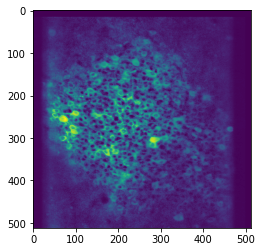

interactive(children=(IntSlider(value=0, description='i_frame', max=15), Output()), _dom_classes=('widget-inte…

Finding optical flow fields between FOVs using sequential template...


100%|███████████████████████████████████████████| 16/16 [00:05<00:00,  3.09it/s]


Registering ROIs...


100%|███████████████████████████████████████████| 16/16 [00:29<00:00,  1.85s/it]


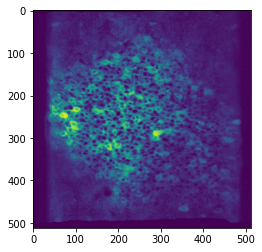

interactive(children=(IntSlider(value=0, description='i_frame', max=15), Output()), _dom_classes=('widget-inte…

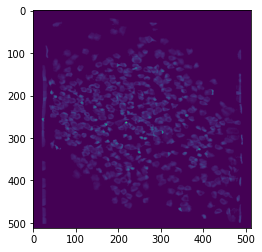

interactive(children=(IntSlider(value=0, description='i_frame', max=15), Output()), _dom_classes=('widget-inte…

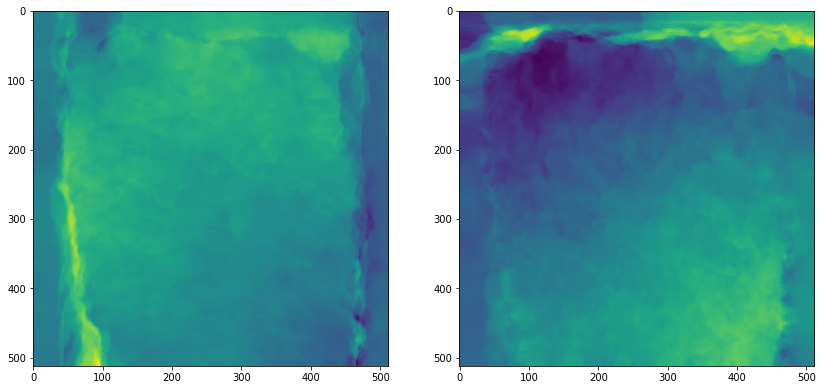

interactive(children=(IntSlider(value=0, description='i_frame', max=15), Output()), _dom_classes=('widget-inte…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
Successful hash comparison. Found matching files: {'params': '/home/rich/Downloads/ROInet/params.json', 'model': '/home/rich/Downloads/ROInet/model.py', 'state_dict': '/home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth'}
Imported model from /home/rich/Downloads/ROInet/model.py
Loaded params_model from /home/rich/Downloads/ROInet/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs


100%|███████████████████████████████████████████| 16/16 [00:01<00:00,  8.46it/s]


Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


  0%|                                                   | 0/928 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node 

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile informati

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


75it [00:00, 300.66it/s]                                                        


Completed: SWT transform on ROIs
Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 16/16 [00:13<00:00,  1.15it/s]


Joining blocks into full similarity matrices...
Joining s_sf...


16it [00:00, 655.10it/s]


Joining s_NN...


16it [00:00, 290.33it/s]


Joining s_SWT...


16it [00:00, 297.19it/s]


Joining s_sesh...


16it [00:00, 275.15it/s]


Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████| 7422/7422 [00:00<00:00, 14776.46it/s]


Normalizing SWT similarity scores...


100%|█████████████████████████████████████| 7422/7422 [00:01<00:00, 4550.95it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.10747544467449188 with parameters {'power_SF': 1.736961766398385, 'power_NN': 0.4682538969664736, 'power_SWT': 0.3095398018341711, 'p_norm': -4.986607280045648, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.49855178342405204, 'b': 0.6428206063920849}, 'sig_SWT_kwargs': {'mu': 0.2603697539817305, 'b': 0.8086733786779978}}
Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/5 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.07s/it]


<IPython.core.display.Javascript object>


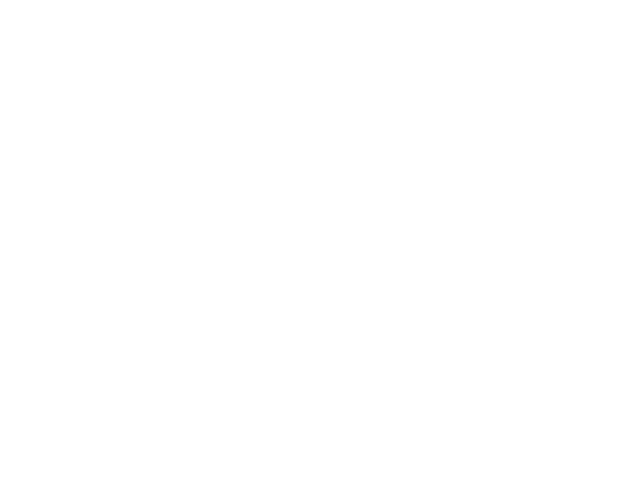

interactive(children=(IntSlider(value=0, description='i_frame', max=15), Output()), _dom_classes=('widget-inte…

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/0
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/1
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/2
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/3
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/4
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/5
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/6
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/7
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY030/8
/media/rich/bigSSD/other lab

18it [00:00, 45.73it/s]

Converted 18 spatial footprint files into small centered images in self.ROI_images.
Imported 18 FOV images into class as self.FOV_images
Importing spatial footprints from stat files.


Imported 18 sessions of spatial footprints into sparse arrays.


<IPython.core.display.Javascript object>


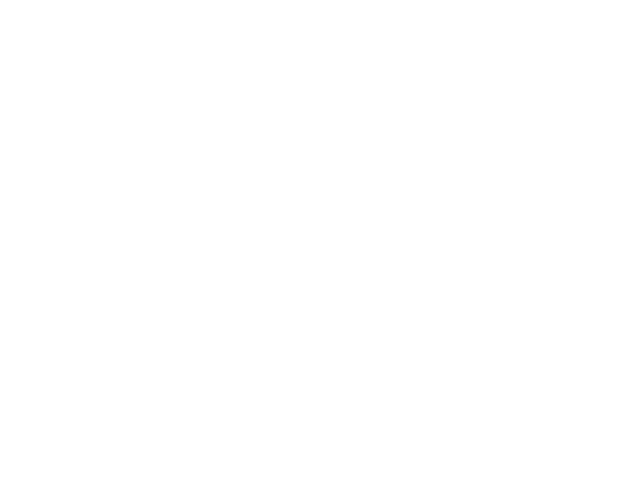

interactive(children=(IntSlider(value=0, description='i_frame', max=17), Output()), _dom_classes=('widget-inte…

Finding optical flow fields between FOVs using sequential template...


100%|███████████████████████████████████████████| 18/18 [00:05<00:00,  3.09it/s]


Registering ROIs...


100%|███████████████████████████████████████████| 18/18 [00:29<00:00,  1.62s/it]


<IPython.core.display.Javascript object>


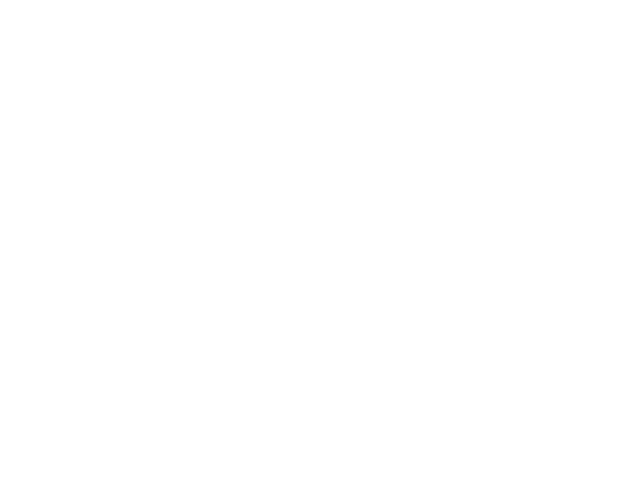

interactive(children=(IntSlider(value=0, description='i_frame', max=17), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


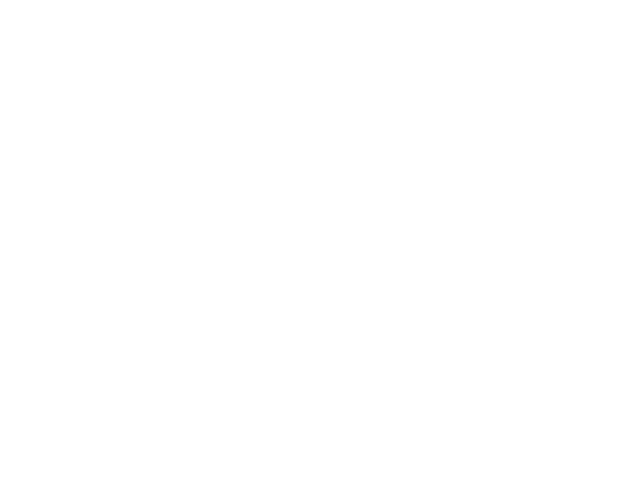

interactive(children=(IntSlider(value=0, description='i_frame', max=17), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


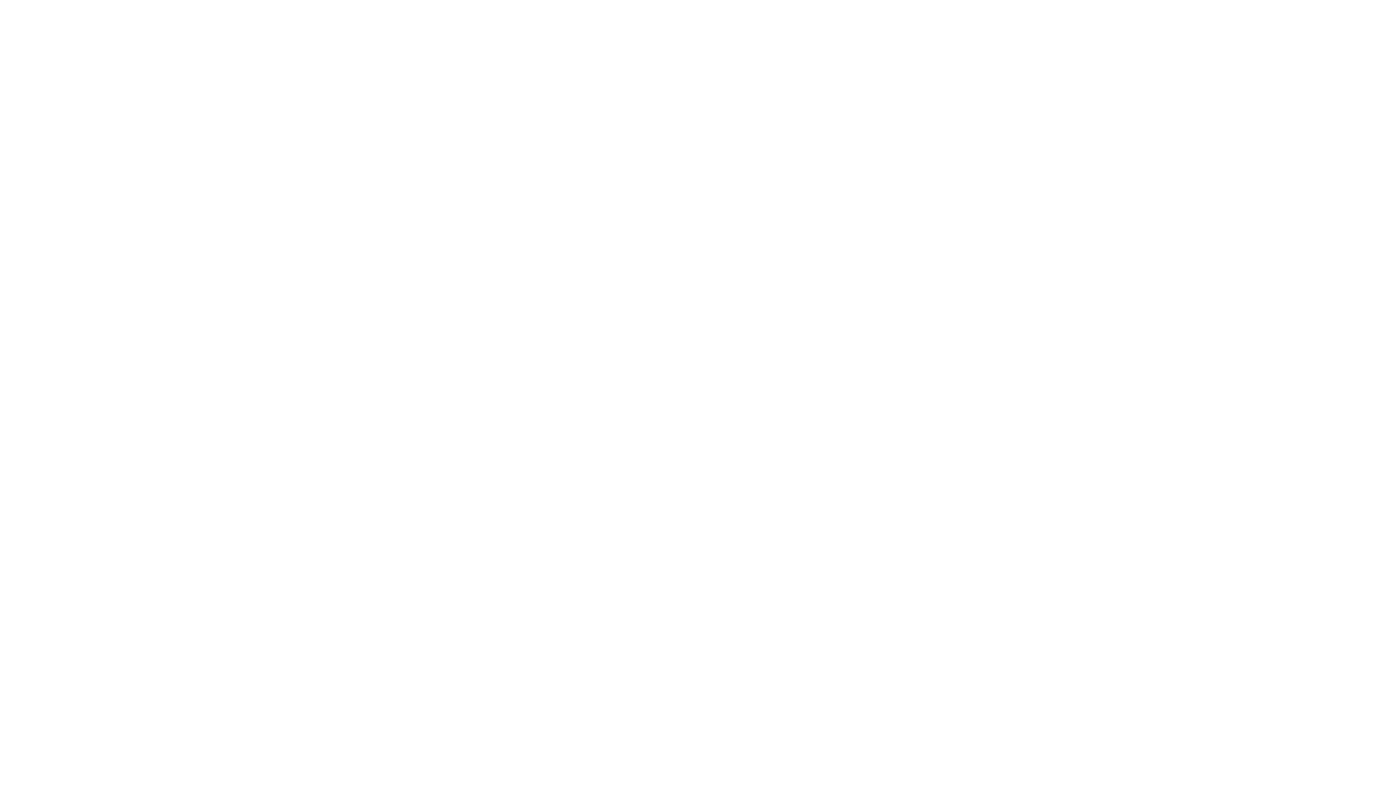

interactive(children=(IntSlider(value=0, description='i_frame', max=17), Output()), _dom_classes=('widget-inte…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
Successful hash comparison. Found matching files: {'params': '/home/rich/Downloads/ROInet/params.json', 'model': '/home/rich/Downloads/ROInet/model.py', 'state_dict': '/home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth'}
Imported model from /home/rich/Downloads/ROInet/model.py
Loaded params_model from /home/rich/Downloads/ROInet/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs


100%|███████████████████████████████████████████| 18/18 [00:01<00:00,  9.57it/s]


Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


  0%|                                                   | 0/917 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node 

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile informati

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


74it [00:00, 223.01it/s]                                                        

Completed: SWT transform on ROIs


<IPython.core.display.Javascript object>


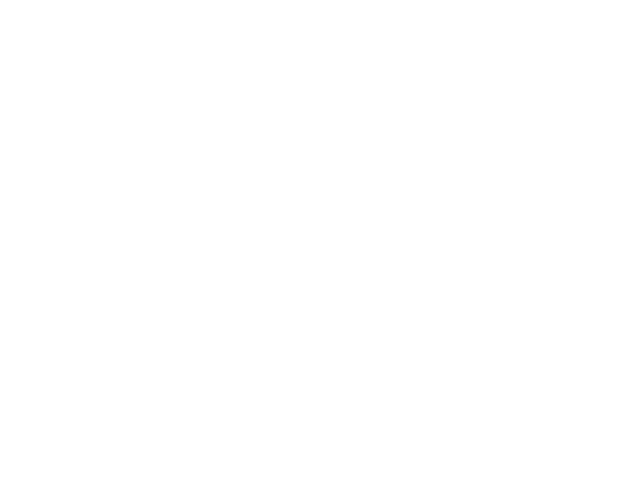

Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 16/16 [00:14<00:00,  1.08it/s]


Joining blocks into full similarity matrices...
Joining s_sf...


16it [00:00, 647.51it/s]


Joining s_NN...


16it [00:00, 288.41it/s]


Joining s_SWT...


16it [00:00, 286.25it/s]


Joining s_sesh...


16it [00:00, 273.60it/s]


Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████| 7334/7334 [00:00<00:00, 14203.37it/s]


Normalizing SWT similarity scores...


100%|█████████████████████████████████████| 7334/7334 [00:01<00:00, 4490.16it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.10958138108253479 with parameters {'power_SF': 1.7370820874479587, 'power_NN': 0.5412905551954227, 'power_SWT': 0.24596639442712143, 'p_norm': -1.588273766727653, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.07615968490402036, 'b': 0.10892994723596294}, 'sig_SWT_kwargs': {'mu': 0.45233847104216535, 'b': 0.5964045150968985}}


<IPython.core.display.Javascript object>


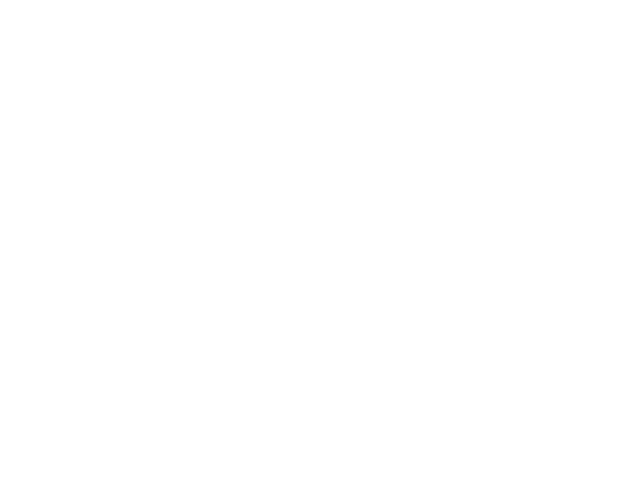

<IPython.core.display.Javascript object>


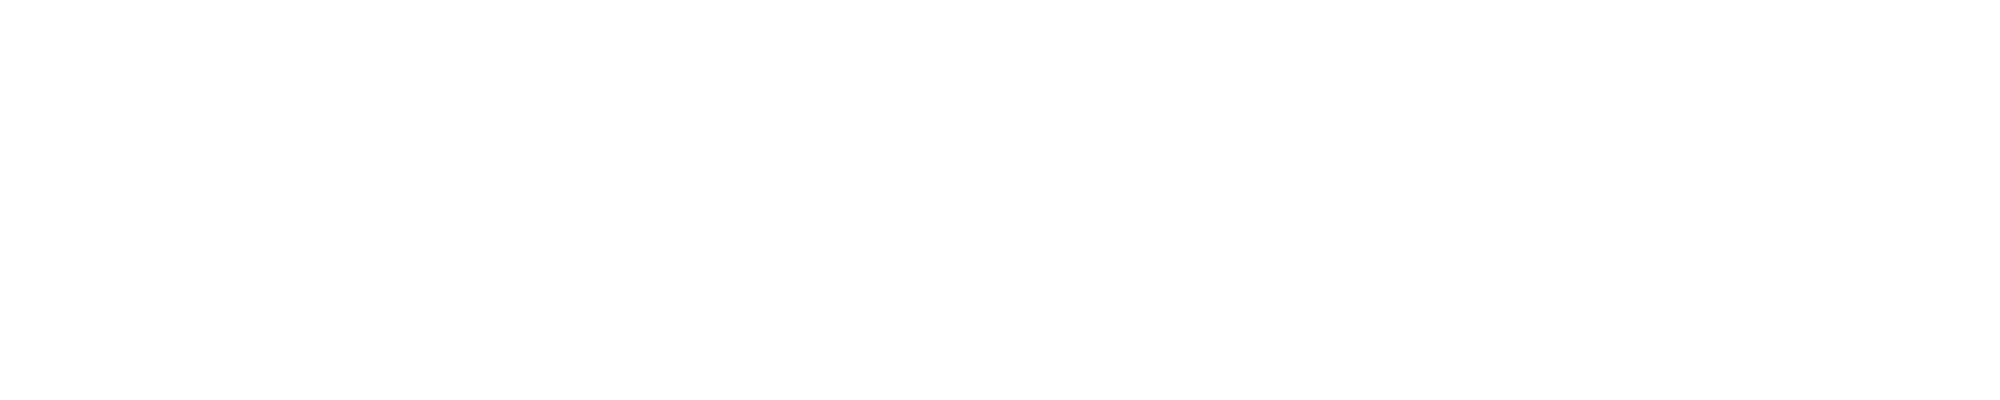

Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/5 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 5/5 [00:14<00:00,  2.90s/it]


<IPython.core.display.Javascript object>


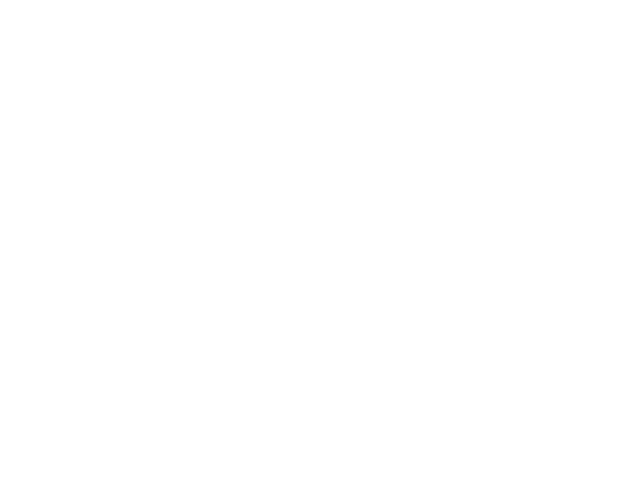

interactive(children=(IntSlider(value=0, description='i_frame', max=17), Output()), _dom_classes=('widget-inte…

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/0
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/1
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/2
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/3
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/4
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/5
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/6
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/7
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY038/8
/med

20it [00:00, 42.28it/s]

Converted 20 spatial footprint files into small centered images in self.ROI_images.
Imported 20 FOV images into class as self.FOV_images
Importing spatial footprints from stat files.


Imported 20 sessions of spatial footprints into sparse arrays.


<IPython.core.display.Javascript object>


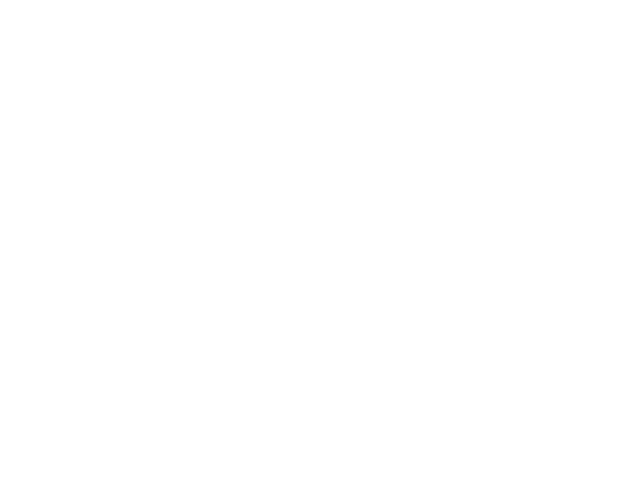

interactive(children=(IntSlider(value=0, description='i_frame', max=19), Output()), _dom_classes=('widget-inte…

Finding optical flow fields between FOVs using sequential template...


100%|███████████████████████████████████████████| 20/20 [00:06<00:00,  3.10it/s]


Registering ROIs...


100%|███████████████████████████████████████████| 20/20 [00:36<00:00,  1.81s/it]


<IPython.core.display.Javascript object>


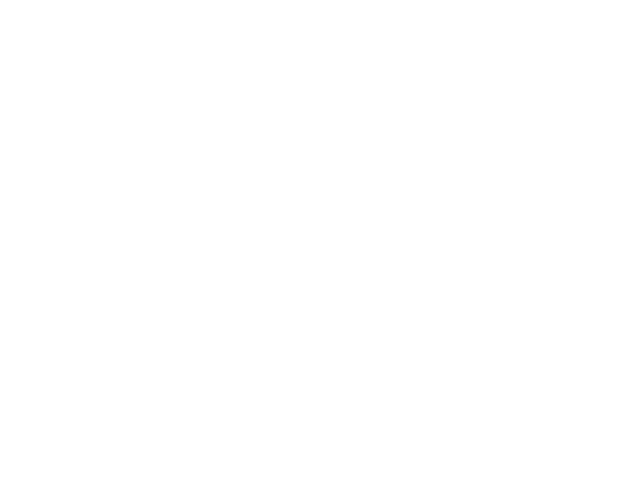

interactive(children=(IntSlider(value=0, description='i_frame', max=19), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


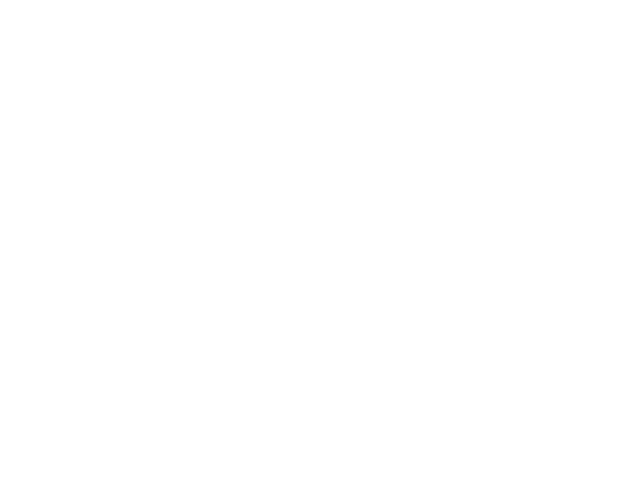

interactive(children=(IntSlider(value=0, description='i_frame', max=19), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


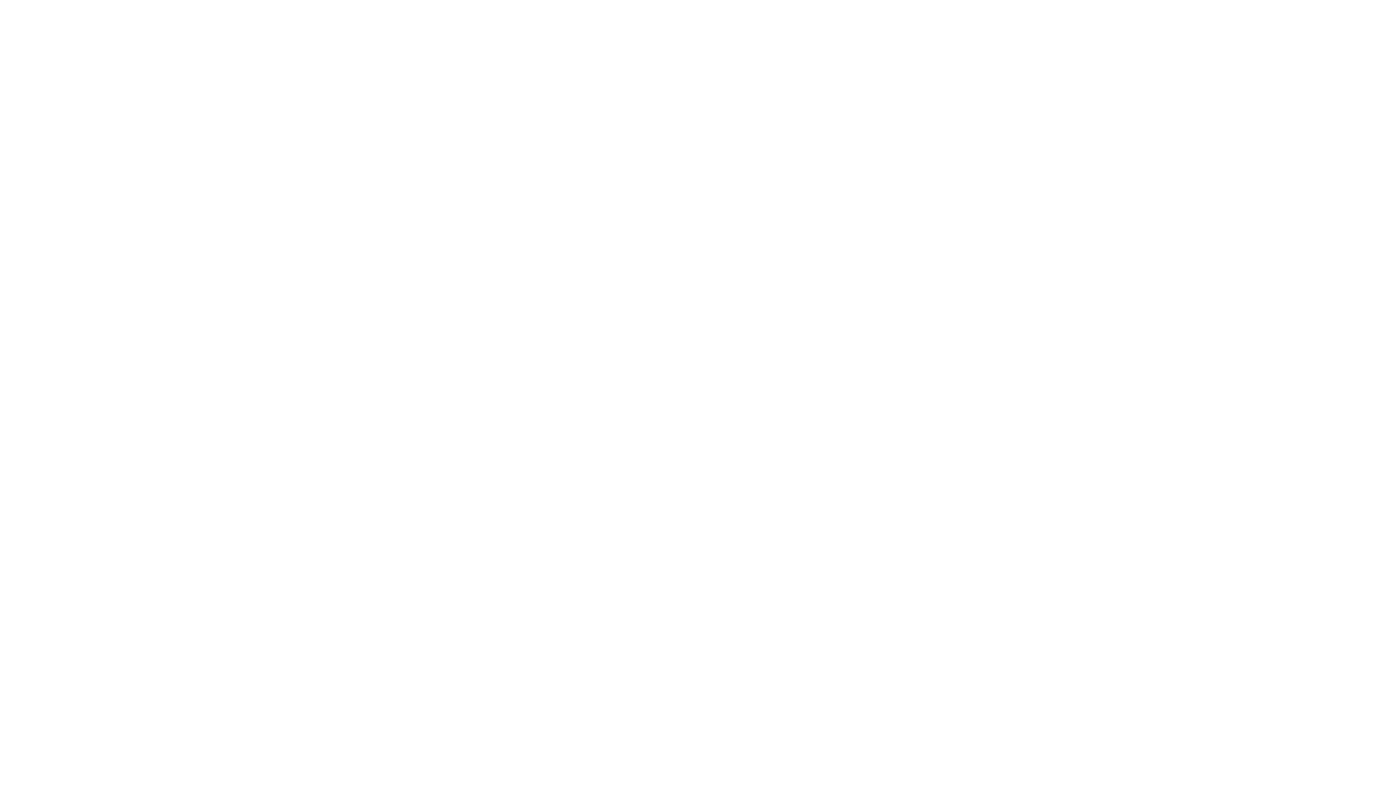

interactive(children=(IntSlider(value=0, description='i_frame', max=19), Output()), _dom_classes=('widget-inte…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
Successful hash comparison. Found matching files: {'params': '/home/rich/Downloads/ROInet/params.json', 'model': '/home/rich/Downloads/ROInet/model.py', 'state_dict': '/home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth'}
Imported model from /home/rich/Downloads/ROInet/model.py
Loaded params_model from /home/rich/Downloads/ROInet/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  8.66it/s]


Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


  0%|                                                  | 0/1141 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node 

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile informati

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


92it [00:00, 223.70it/s]                                                        

Completed: SWT transform on ROIs


<IPython.core.display.Javascript object>


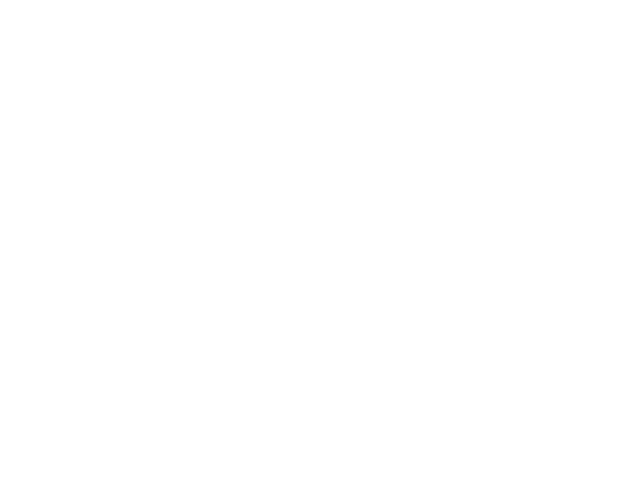

Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 16/16 [00:16<00:00,  1.01s/it]


Joining blocks into full similarity matrices...
Joining s_sf...


16it [00:00, 320.84it/s]


Joining s_NN...


16it [00:00, 233.74it/s]


Joining s_SWT...


16it [00:00, 237.08it/s]


Joining s_sesh...


16it [00:00, 218.80it/s]


Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████| 9124/9124 [00:00<00:00, 14654.42it/s]


Normalizing SWT similarity scores...


100%|█████████████████████████████████████| 9124/9124 [00:02<00:00, 4438.49it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.13329532742500305 with parameters {'power_SF': 1.8284935371473034, 'power_NN': 0.5912012999702158, 'power_SWT': 0.17728225973337583, 'p_norm': -4.011671858109349, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.33815305970139026, 'b': 0.15578153733783018}, 'sig_SWT_kwargs': {'mu': 0.4135750565148619, 'b': 0.7895720927869451}}


<IPython.core.display.Javascript object>


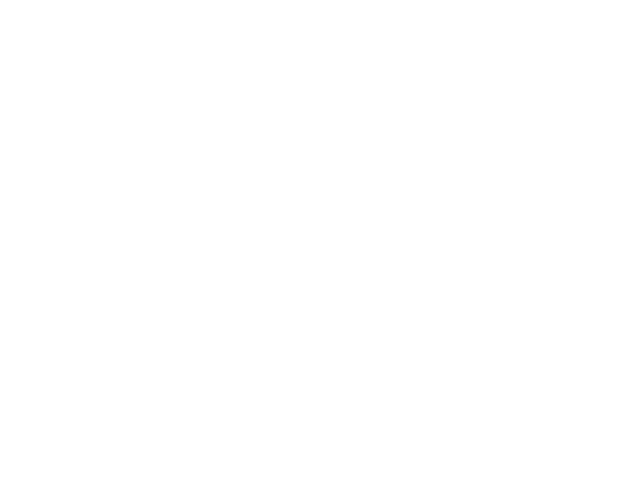

<IPython.core.display.Javascript object>


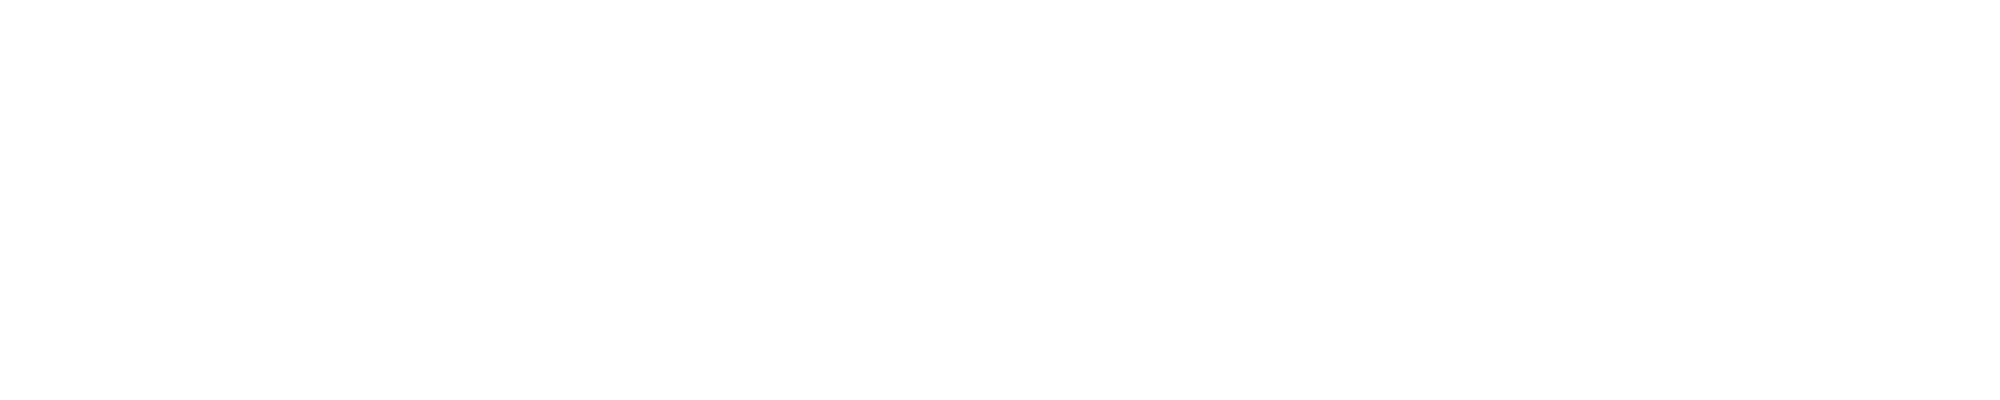

Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/5 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 5/5 [00:20<00:00,  4.17s/it]


<IPython.core.display.Javascript object>


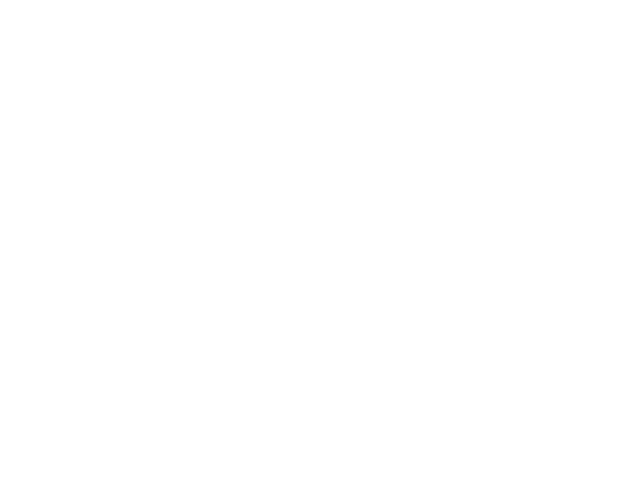

interactive(children=(IntSlider(value=0, description='i_frame', max=19), Output()), _dom_classes=('widget-inte…

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/0
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/1
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/2
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/3
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/4
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/5
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/6
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY039/7
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/

21it [00:00, 43.06it/s]

Converted 21 spatial footprint files into small centered images in self.ROI_images.
Imported 21 FOV images into class as self.FOV_images
Importing spatial footprints from stat files.


Imported 21 sessions of spatial footprints into sparse arrays.


<IPython.core.display.Javascript object>


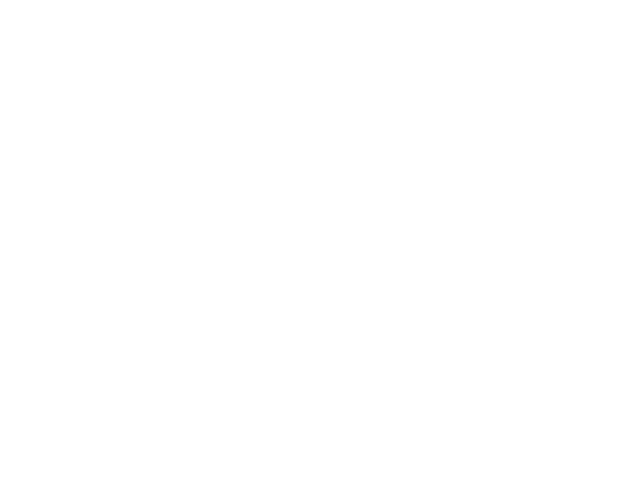

interactive(children=(IntSlider(value=0, description='i_frame', max=20), Output()), _dom_classes=('widget-inte…

Finding optical flow fields between FOVs using sequential template...


100%|███████████████████████████████████████████| 21/21 [00:06<00:00,  3.08it/s]


Registering ROIs...


100%|███████████████████████████████████████████| 21/21 [00:37<00:00,  1.78s/it]


<IPython.core.display.Javascript object>


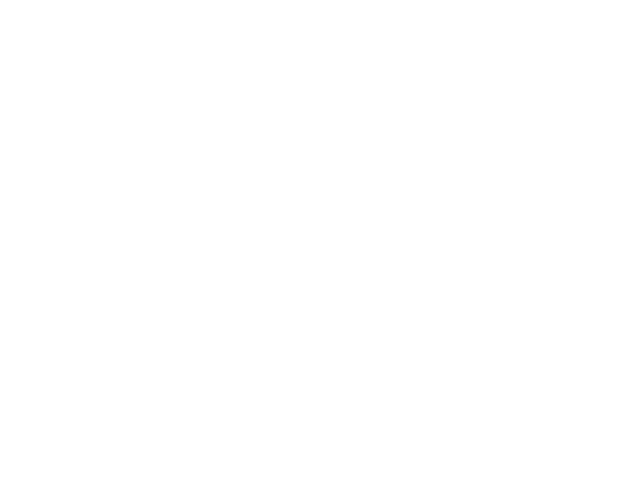

interactive(children=(IntSlider(value=0, description='i_frame', max=20), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


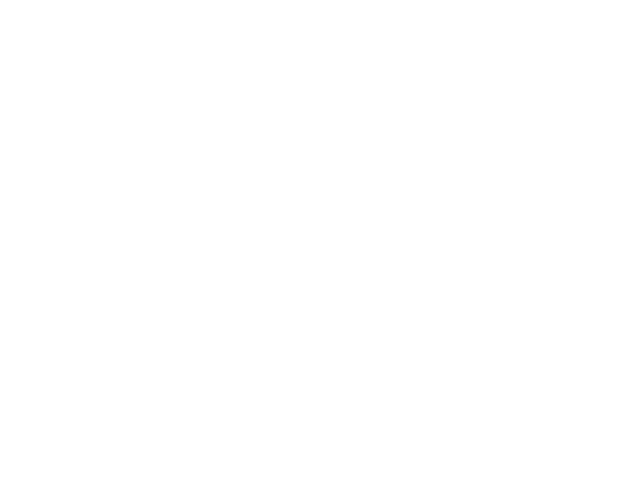

interactive(children=(IntSlider(value=0, description='i_frame', max=20), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


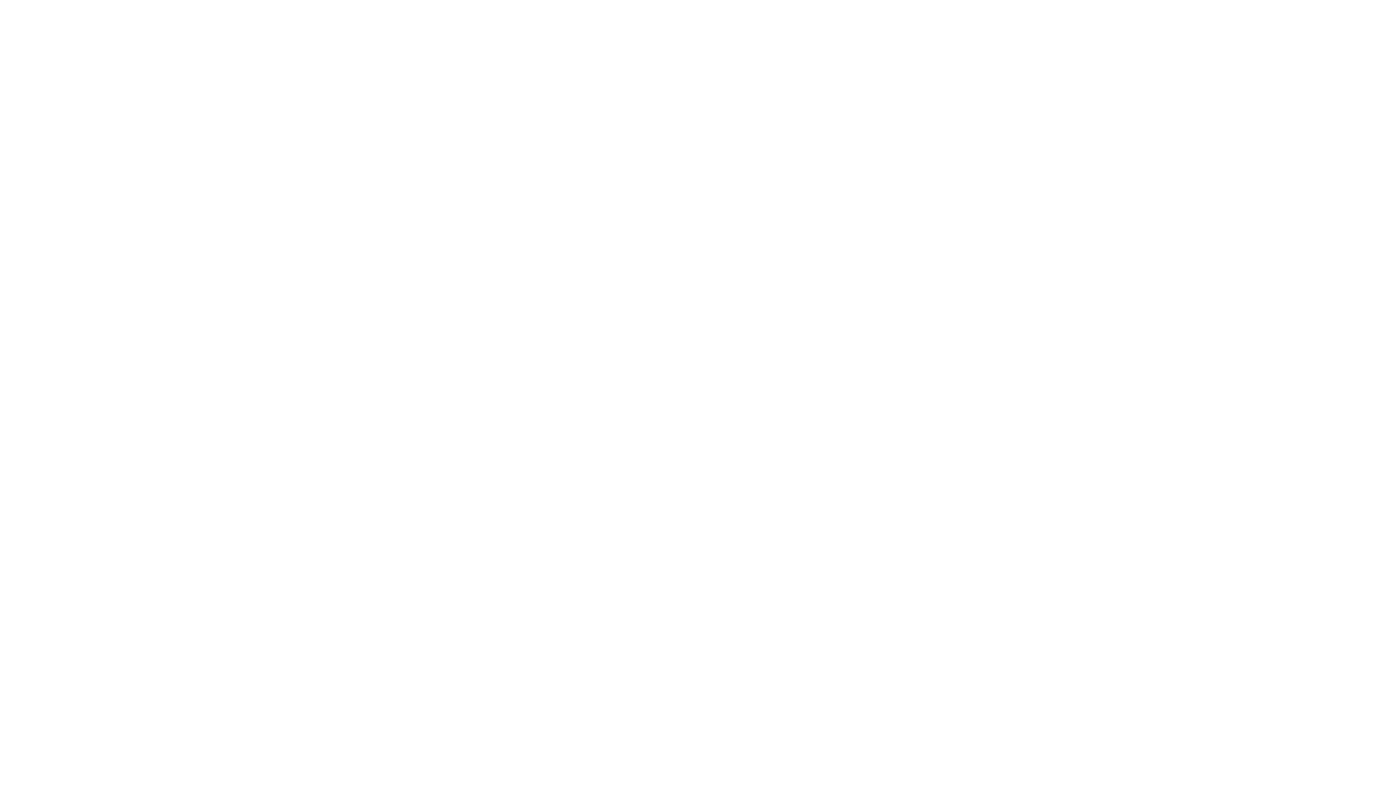

interactive(children=(IntSlider(value=0, description='i_frame', max=20), Output()), _dom_classes=('widget-inte…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
Successful hash comparison. Found matching files: {'params': '/home/rich/Downloads/ROInet/params.json', 'model': '/home/rich/Downloads/ROInet/model.py', 'state_dict': '/home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth'}
Imported model from /home/rich/Downloads/ROInet/model.py
Loaded params_model from /home/rich/Downloads/ROInet/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.53it/s]


Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


  0%|                                                  | 0/1185 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node 

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile informati

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


  0%|                                                 | 0/94.74 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|███████████████████████████████████████| 95/94.74 [00:00<00:00, 219.84it/s]

Completed: SWT transform on ROIs


<IPython.core.display.Javascript object>


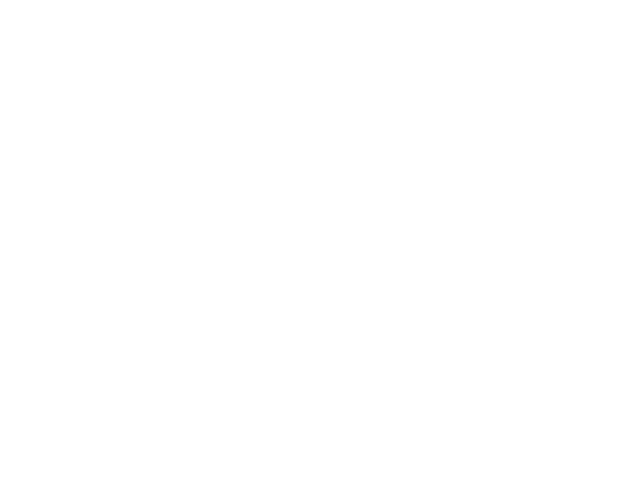

Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 16/16 [00:16<00:00,  1.01s/it]


Joining blocks into full similarity matrices...
Joining s_sf...


16it [00:00, 410.61it/s]


Joining s_NN...


16it [00:00, 230.98it/s]


Joining s_SWT...


16it [00:00, 230.34it/s]


Joining s_sesh...


16it [00:00, 208.62it/s]


Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████| 9474/9474 [00:00<00:00, 14503.31it/s]


Normalizing SWT similarity scores...


100%|█████████████████████████████████████| 9474/9474 [00:02<00:00, 4523.12it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.0975676029920578 with parameters {'power_SF': 1.5873433002928246, 'power_NN': 0.3601557499977941, 'power_SWT': 0.18618194135803598, 'p_norm': -4.518763067407147, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.4175563664220473, 'b': 0.2739288882878389}, 'sig_SWT_kwargs': {'mu': 0.2545402762586695, 'b': 0.17894473087166884}}


<IPython.core.display.Javascript object>


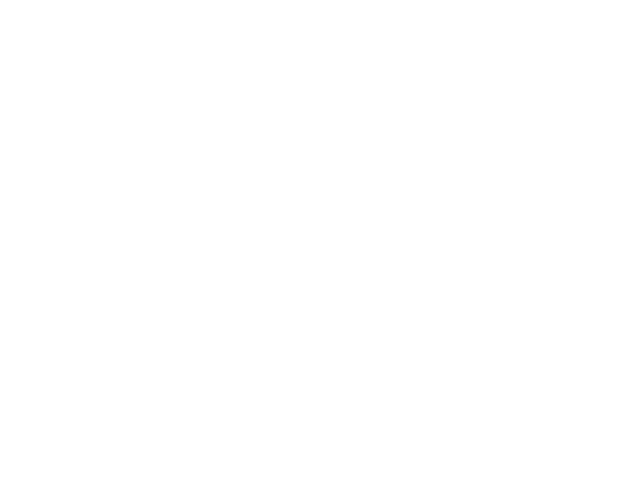

<IPython.core.display.Javascript object>


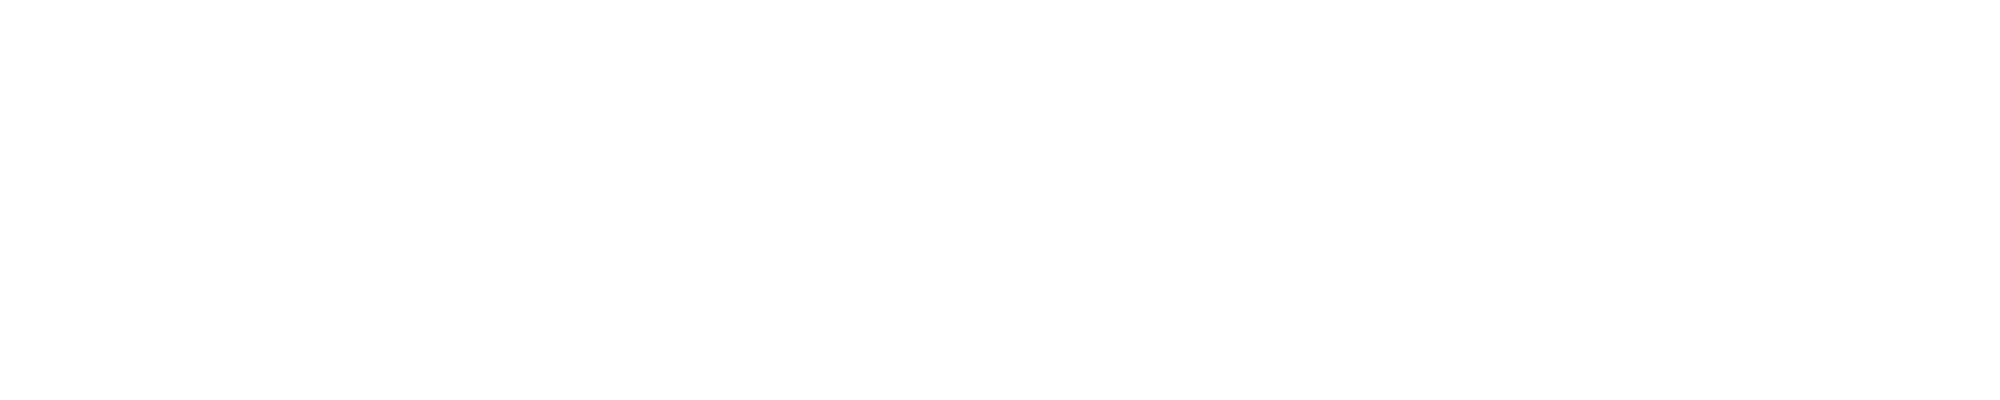

Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


100%|█████████████████████████████████████████████| 5/5 [00:21<00:00,  4.25s/it]


<IPython.core.display.Javascript object>


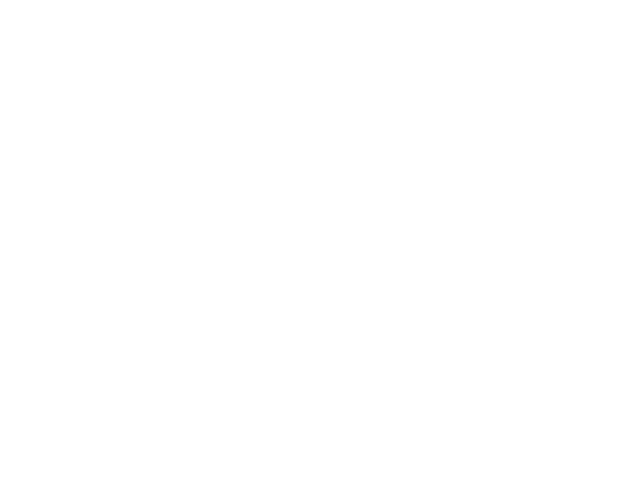

interactive(children=(IntSlider(value=0, description='i_frame', max=20), Output()), _dom_classes=('widget-inte…

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/0
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/1
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/2
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/3
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/4
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/5
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/6
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/7
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_truth/NY044/8
/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/NOAH_alignment_ground_trut

14it [00:00, 39.91it/s]

Converted 14 spatial footprint files into small centered images in self.ROI_images.
Imported 14 FOV images into class as self.FOV_images
Importing spatial footprints from stat files.


Imported 14 sessions of spatial footprints into sparse arrays.


<IPython.core.display.Javascript object>


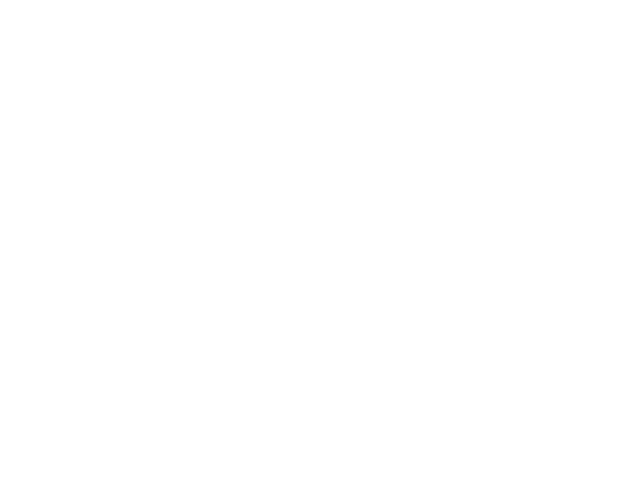

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

Finding optical flow fields between FOVs using sequential template...


100%|███████████████████████████████████████████| 14/14 [00:04<00:00,  2.94it/s]


Registering ROIs...


100%|███████████████████████████████████████████| 14/14 [00:27<00:00,  1.99s/it]


<IPython.core.display.Javascript object>


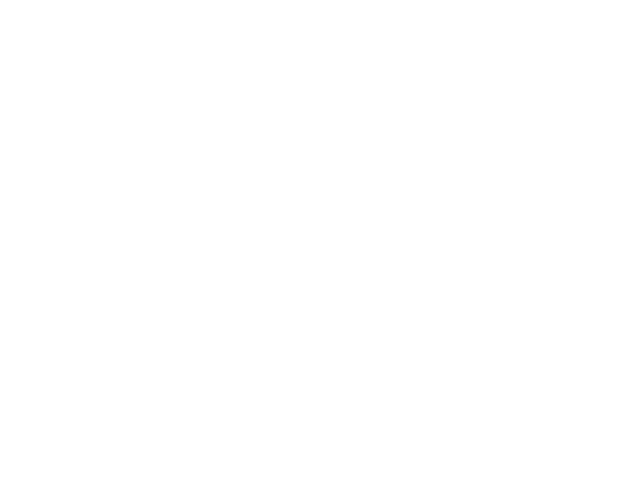

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


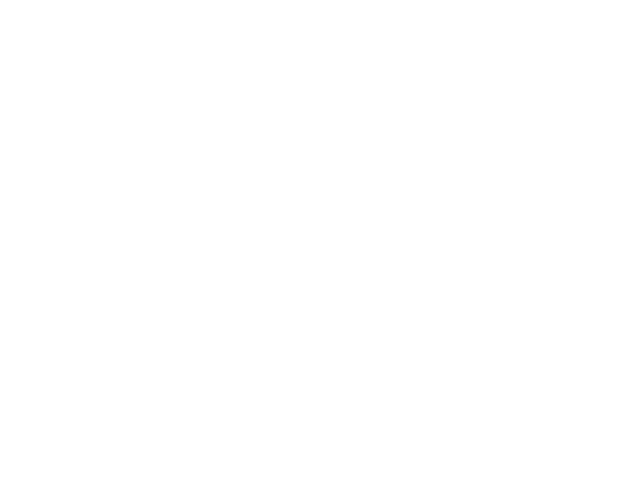

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>


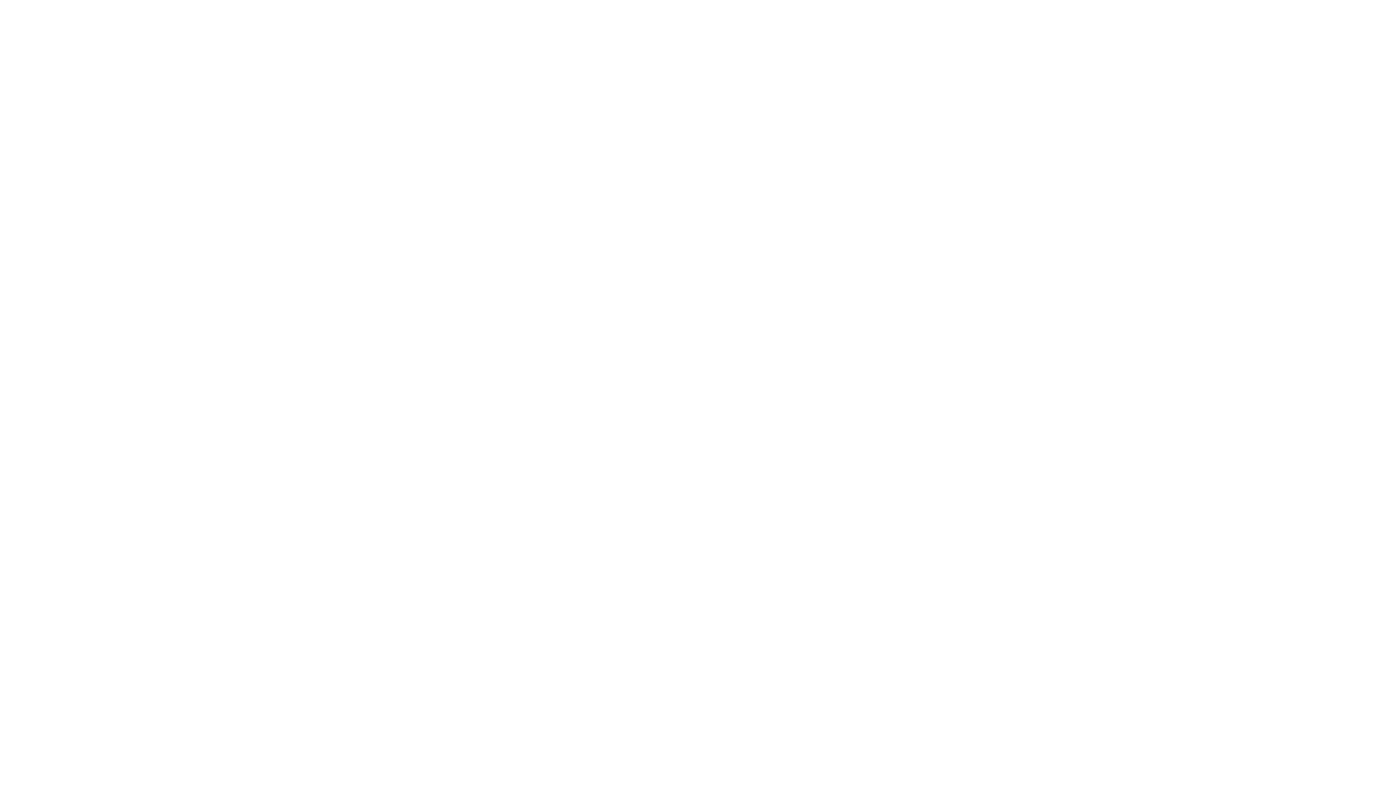

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

Preparing the Toeplitz convolution matrix
Performing convolution for blurring
Successful hash comparison. Found matching files: {'params': '/home/rich/Downloads/ROInet/params.json', 'model': '/home/rich/Downloads/ROInet/model.py', 'state_dict': '/home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth'}
Imported model from /home/rich/Downloads/ROInet/model.py
Loaded params_model from /home/rich/Downloads/ROInet/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Downloads/ROInet/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0
Starting: resizing ROIs


100%|███████████████████████████████████████████| 14/14 [00:01<00:00,  7.72it/s]


Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader
starting: running data through network


  0%|                                                   | 0/881 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node 

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %253 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile informati

completed: running data through network
SWT initialized
Starting: SWT transform on ROIs


71it [00:00, 220.51it/s]                                                        

Completed: SWT transform on ROIs


<IPython.core.display.Javascript object>


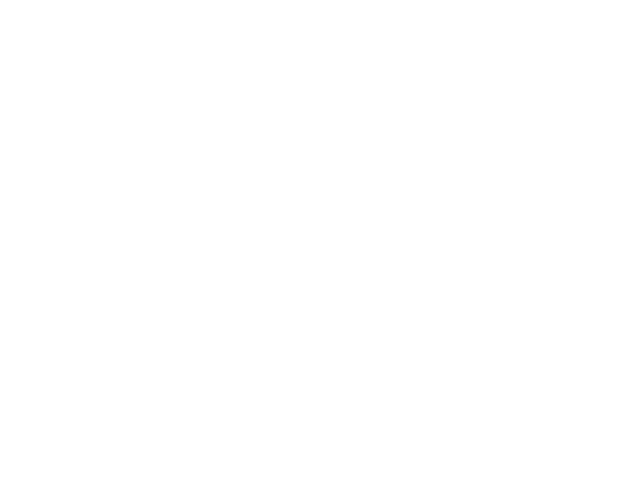

Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 16/16 [00:13<00:00,  1.19it/s]


Joining blocks into full similarity matrices...
Joining s_sf...


16it [00:00, 281.07it/s]


Joining s_NN...


16it [00:00, 357.83it/s]


Joining s_SWT...


16it [00:00, 397.48it/s]


Joining s_sesh...


16it [00:00, 361.76it/s]


Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|████████████████████████████████████| 7047/7047 [00:00<00:00, 14606.05it/s]


Normalizing SWT similarity scores...


100%|█████████████████████████████████████| 7047/7047 [00:01<00:00, 4401.89it/s]


Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.10798314958810806 with parameters {'power_SF': 1.6963431231490507, 'power_NN': 0.40369593090488043, 'power_SWT': 0.6400107055942656, 'p_norm': -2.8725429797036877, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.14444734141228852, 'b': 1.1873320884465137}, 'sig_SWT_kwargs': {'mu': 0.33532460892622407, 'b': 0.7252745813443903}}


<IPython.core.display.Javascript object>


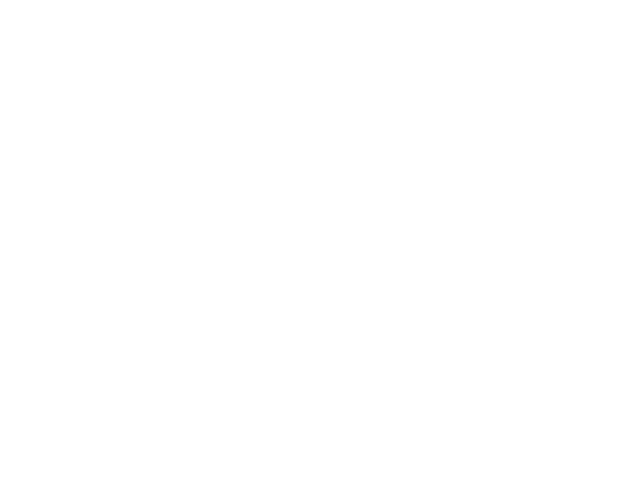

<IPython.core.display.Javascript object>


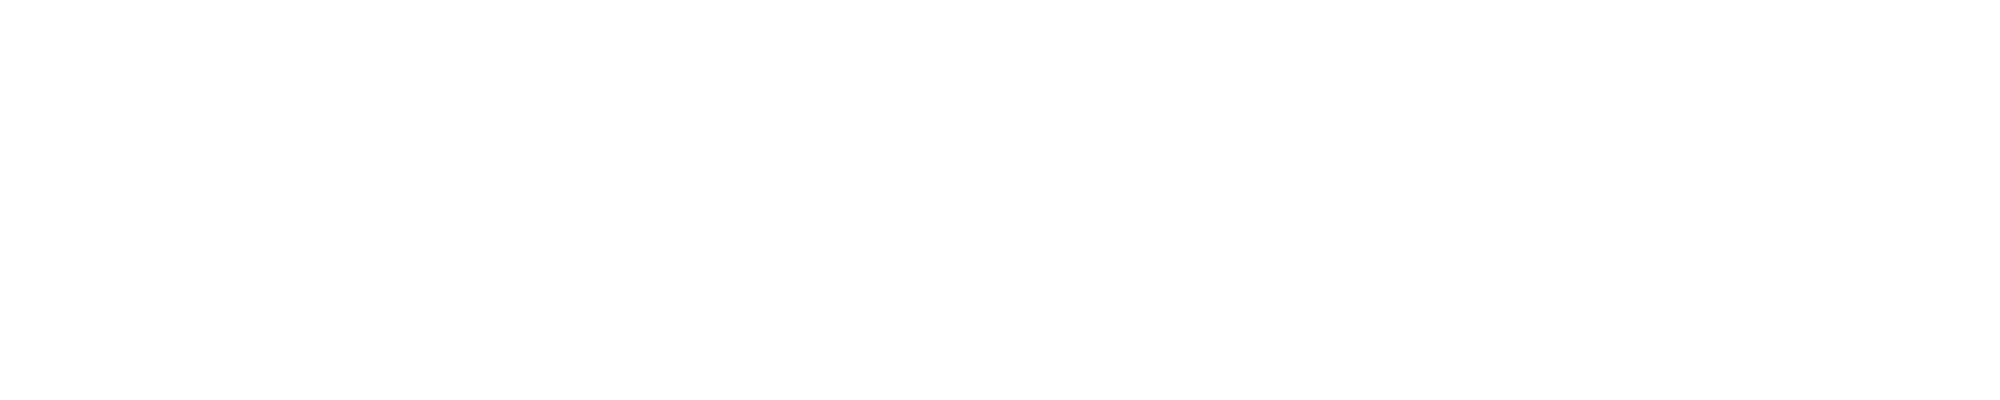

Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/5 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/rich_clust/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 5/5 [00:13<00:00,  2.75s/it]


<IPython.core.display.Javascript object>


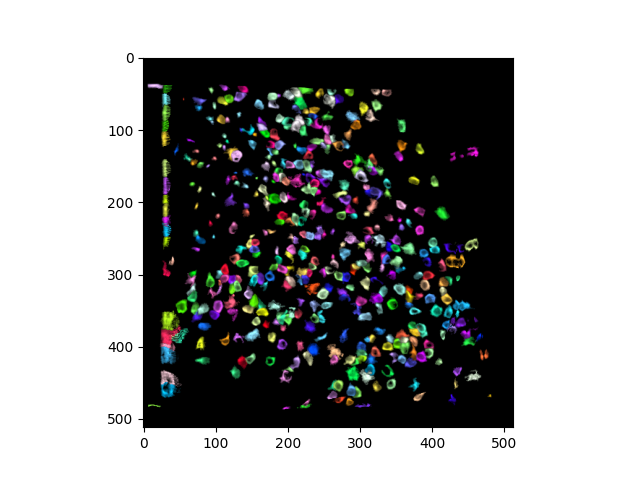

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

In [9]:
for params in params_all:
    # %matplotlib notebook


    # Import paths
    def print_list(l):
        for item in l:
            print(item)

    dir_allOuterFolders = Path(params['paths']['dir_allOuterFolders']).resolve()

    folders_allSessions = natsort.natsorted(helpers.get_dir_contents(dir_allOuterFolders)[0])

    folders_toUse = folders_allSessions
    # folders_toUse = list(map(folders_allSessions.__getitem__, [np.arange(1,9, dtype=np.int32)]))


    # dir_allS2pFolders = [dir_allOuterFolders / folder / 'exp' / 'suite2p' / 'plane0' for folder in folders_toUse]
    dir_allS2pFolders = [dir_allOuterFolders / folder for folder in folders_toUse]

    pathSuffixToStat = params['paths']['pathSuffixToStat']
    pathSuffixToOps = params['paths']['pathSuffixToOps']

    paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])[:]
    paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])[:]

    print(folders_allSessions)
    print(folders_toUse)
    print_list(dir_allS2pFolders)
    print_list(paths_allStat)

    toc['import_paths'] = time.time() - tic


    #Import data
    data = data_importing.Data_suite2p(
        paths_statFiles=paths_allStat,
        paths_opsFiles=paths_allOps,
        um_per_pixel=params['importing']['um_per_pixel'],    
        new_or_old_suite2p=params['importing']['new_or_old_suite2p'],
        verbose=params['importing']['data_verbose'],
    );

    data.import_ROI_centeredImages(
        out_height_width=params['importing']['out_height_width'],
        max_footprint_width=params['importing']['max_footprint_width'],
    );

    data.import_FOV_images(
        type_meanImg=params['importing']['type_meanImg'],
        images=params['importing']['images'],
    );

    data.import_ROI_spatialFootprints(workers=params['importing']['import_workers']);

    # visualization.display_toggle_image_stack(data.FOV_images)

    toc['import_data'] = time.time() - tic


    # Alignment
    FOV_images = [alignment.clahe(im, grid_size=params['alignment']['CLAHE_nGrid'], clipLimit=np.inf, normalize=True) for im in data.FOV_images[:]] if params['alignment']['use_CLAHE'] else data.FOV_images
    st = params['alignment']['session_template']
    idx_st = int(st * data.n_sessions) if type(st) is float else st

    if params['alignment']['do_phaseCorrReg']:
        if params['alignment']['phaseCorr']['template_method'] == 'image':
            template = FOV_images[idx_st] 
        if params['alignment']['phaseCorr']['template_method'] == 'sequential':
            template = idx_st
            
        pcr = alignment.PhaseCorrelation_registration()

        pcr.set_spectral_mask(
            freq_highPass=params['alignment']['phaseCorr']['freq_highPass'],
            freq_lowPass=params['alignment']['phaseCorr']['freq_lowPass'],
            im_shape=(data.FOV_height, data.FOV_width)
        )

        pcr.register(
            template=template,
            ims_moving=FOV_images,
            template_method=params['alignment']['phaseCorr']['template_method'],
        );
        
        FOV_images_forAligner = pcr.ims_registered
        shifts = pcr.shifts
        
        visualization.display_toggle_image_stack(pcr.ims_registered[:])
    else:
        FOV_images_forAligner = FOV_images
        shifts = None
        
    if params['alignment']['nonrigid']['template_method'] == 'image':
        template = FOV_images_forAligner[idx_st] 
    if params['alignment']['nonrigid']['template_method'] == 'sequential':
        template = idx_st

    aligner = alignment.Alinger(
        method=params['alignment']['nonrigid']['method'],
        kwargs_method=params['alignment']['nonrigid']['kwargs_method'],
    )

    aligner.register_ROIs(
        template=template,
        FOVs=FOV_images_forAligner,
        ROIs=data.spatialFootprints,
        template_method=params['alignment']['nonrigid']['template_method'],
        shifts=shifts,
        return_sparse=params['alignment']['nonrigid']['return_sparse'],
        normalize=params['alignment']['nonrigid']['normalize'],
    );

    visualization.display_toggle_image_stack(aligner.FOVs_aligned)
    visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection(), clim=[0,0.03])
    visualization.display_toggle_2channel_image_stack(aligner.flows)

    toc['alignment'] = time.time() - tic


    # Blur ROIs (optional)
    blurrer = blurring.ROI_Blurrer(
        frame_shape=(data.FOV_height, data.FOV_width),
        kernel_halfWidth=params['blurring']['kernel_halfWidth'],
        plot_kernel=params['blurring']['plot_kernel'],
    )

    blurrer.blur_ROIs(
        spatialFootprints=aligner.ROIs_aligned,
    )

    # visualization.display_toggle_image_stack(blurrer.get_ROIsBlurred_maxIntensityProjection())

    toc['blur'] = time.time() - tic


    # Neural network embedding distances
    roinet = ROInet.ROInet_embedder(
        device=params['ROInet']['device'],
        dir_networkFiles=params['ROInet']['dir_networkFiles'],
        download_from_gDrive=params['ROInet']['download_from_gDrive'],
        gDriveID=params['ROInet']['gDriveID'],
        hash_dict_networkFiles=params['ROInet']['hash_dict_true'],
        verbose=params['ROInet']['verbose'],
    )

    roinet.generate_dataloader(
        ROI_images=data.ROI_images,
        um_per_pixel=params['importing']['um_per_pixel'],
        pref_plot=params['ROInet']['pref_plot'],
        batchSize_dataloader=params['ROInet']['batchSize_dataloader'],
        pinMemory_dataloader=params['ROInet']['pinMemory_dataloader'],
        numWorkers_dataloader=mp.cpu_count(),
        persistentWorkers_dataloader=params['ROInet']['persistentWorkers_dataloader'],
        prefetchFactor_dataloader=params['ROInet']['prefetchFactor_dataloader'],    
    );

    # visualization.display_toggle_image_stack(roinet.ROI_images_rs)

    roinet.generate_latents();

    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()

    toc['NN'] = time.time() - tic


    # Scattering wavelet embedding distances
    swt = scatteringWaveletTransformer.SWT(
        kwargs_Scattering2D=params['SWT']['kwargs_Scattering2D'], 
        image_shape=params['importing']['out_height_width'], 
        device=params['SWT']['device'],
    )

    swt.transform(ROI_images=np.concatenate(data.ROI_images, axis=0));

    toc['SWT'] = time.time() - tic


    # Compute similarities
    sim = similarity_graph.ROI_graph(
        n_workers=params['similarity']['n_workers'],
        frame_height=data.FOV_height,
        frame_width=data.FOV_width,
        block_height=params['similarity']['block_height'],
        block_width=params['similarity']['block_width'],
        algorithm_nearestNeigbors_spatialFootprints=params['similarity']['algorithm_nearestNeigbors_spatialFootprints'],
        verbose=params['similarity']['verbose'],
    )

    sim.visualize_blocks()

    sim.compute_similarity_blockwise(
        spatialFootprints=blurrer.ROIs_blurred,
        features_NN=roinet.latents,
        features_SWT=swt.latents,
        ROI_session_bool=data.sessionID_concat,
        spatialFootprint_maskPower=params['similarity']['spatialFootprint_maskPower'],
    );

    sim.make_normalized_similarities(
        centers_of_mass=data.get_midCoords(),
        features_NN=roinet.latents,
        features_SWT=swt.latents,
        k_max=params['similarity']['normalization']['k_max'],
        k_min=params['similarity']['normalization']['k_min'],
        algo_NN=params['similarity']['normalization']['algo_NN'],
        device=params['similarity']['normalization']['device'],
    )

    toc['sim'] = time.time() - tic

    ## Cluster
    clusterer = clustering.Clusterer(
        s_sf=sim.s_sf,
        s_NN_z=sim.s_NN_z,
        s_SWT_z=sim.s_SWT_z,
        s_sesh=sim.s_sesh,
    )

    kwargs_makeConjunctiveDistanceMatrix_best = clusterer.find_optimal_parameters_for_pruning(
        n_bins=params['clustering']['auto_pruning']['n_bins'],
        find_parameters_automatically=params['clustering']['auto_pruning']['find_parameters_automatically'],
        kwargs_findParameters=params['clustering']['auto_pruning']['kwargs_findParameters'],
        bounds_findParameters=params['clustering']['auto_pruning']['bounds_findParameters'],
        n_jobs_findParameters=params['clustering']['auto_pruning']['n_jobs'],
    #     fallback_d_cutoff=0.5,
    #     plot_pref=True,
    )

    toc['separate_diffSame'] = time.time() - tic

    if params['clustering']['plot_pref']:
        clusterer.plot_distSame()

        clusterer.plot_similarity_relationships(
            plots_to_show=[1,2,3], 
            max_samples=100000, 
            kwargs_scatter={'s':1, 'alpha':0.2},
            kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
        );

    clusterer.make_pruned_similarity_graphs(
        kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best
    )

    if params['clustering']['method']=='hungarian' or ((params['clustering']['method']=='auto') and (data.n_sessions<8)):
        labels = clusterer.fit_sequentialHungarian(
            session_bool=data.sessionID_concat,
            thresh_cost=params['clustering']['hungarian']['thresh_cost'],
            d_conj=None,
#             kwargs_makeConjunctiveDistanceMatrix={
#             'power_SF': 1.0,
#             'power_NN': 1.0,
#             'power_SWT': 0.1,
#             'p_norm': -2,
#             'sig_SF_kwargs': None,
#             'sig_NN_kwargs':  {'mu':0, 'b':0.2},
#             'sig_SWT_kwargs': {'mu':0, 'b':0.2},
#             },
        )
    else:
        labels = clusterer.fit(
            session_bool=data.sessionID_concat,
            min_cluster_size=params['clustering']['hdbscan']['min_cluster_size'],
            cluster_selection_method=params['clustering']['hdbscan']['cluster_selection_method'],
            d_clusterMerge=params['clustering']['hdbscan']['d_clusterMerge'],
            alpha=params['clustering']['hdbscan']['alpha'],
            n_iter_violationCorrection=params['clustering']['hdbscan']['n_iter_violationCorrection'],
            d_conj=None,
            kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
            split_intraSession_clusters=params['clustering']['hdbscan']['split_intraSession_clusters'],
            d_step=params['clustering']['hdbscan']['d_step'],
            discard_failed_pruning=params['clustering']['hdbscan']['discard_failed_pruning'],
        )

    labels_bySession = [labels[idx] for idx in data.sessionID_concat.T]

    toc['clustering'] = time.time() - tic

    # visualization
    FOV_clusters = visualization.compute_colored_FOV(
        boolSessionID=data.sessionID_concat,
        spatialFootprints=aligner.ROIs_aligned,
        FOV_height=data.FOV_height,
        FOV_width=data.FOV_width,
        labels=labels,
        confidence=None,
    #     threshold_confidence = 0.99,
    )

    %matplotlib notebook
    visualization.display_toggle_image_stack(FOV_clusters)

    toc['visualize'] = time.time() - tic


    ## Save results
    dir_save = Path(params['paths']['dir_allOuterFolders']).resolve() if params['paths']['dir_save'] is None else Path(params['paths']['dir_save']).resolve()
    filenamePrefix_save = dir_allOuterFolders.name if params['paths']['filenamePrefix_save'] is None else params['paths']['filenamePrefix_save']
    path_save = dir_save / (filenamePrefix_save + '.ROICaT.results' + '.pkl')

    ROIs = {
        "ROIs_aligned": aligner.ROIs_aligned,
        "ROIs_raw": data.spatialFootprints,
        "frame_height": data.FOV_height,
        "frame_width": data.FOV_width,
        "idx_roi_session": np.where(data.sessionID_concat)[1]
    }

    results = {
        "UCIDs": labels,
        "UCIDs_bySession": labels_bySession,
        "ROIs": ROIs,
        "params": params,
        "runTimes": toc,
    }

    helpers.pickle_save(
        obj=results,
        filename=path_save,
        mkdir=True,
    )
    gc.collect()
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.empty_cache()

    toc['saving'] = time.time() - tic

In [10]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [11]:
print(toc)

{'start': 4.792213439941406e-05, 'import_paths': 549.0650691986084, 'import_data': 555.2761793136597, 'alignment': 588.7989311218262, 'blur': 590.3435328006744, 'NN': 622.0427417755127, 'SWT': 622.5419280529022, 'sim': 644.3868465423584, 'separate_diffSame': 652.7550375461578, 'clustering': 671.824624300003, 'visualize': 672.3859570026398, 'saving': 672.7799186706543}


In [ ]:
# if params['clustering']['plot_pref']:
#     clusterer.plot_distSame()

#     clusterer.plot_similarity_relationships(
#         plots_to_show=[1,2,3], 
#         max_samples=100000, 
#         kwargs_scatter={'s':1, 'alpha':0.2},
#         kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
#     );


In [ ]:
# import numpy as np
# import scipy.sparse

# import torch_sparse as ts

# scipy.sparse.save_npz(
#     file=r'/home/rich/Desktop/c_sim.npz',
#     matrix=sim.c_sim.tocsr(),
#     compressed=True
# )
# scipy.sparse.save_npz(
#     file=r'/home/rich/Desktop/cluster_bool.npz',
#     matrix=sim.cluster_bool.tocsr(),
#     compressed=True
# )
# np.save(
#     file=r'/home/rich/Desktop/scores.npy',
#     arr=sim.scores.numpy(),
# )

# c_sim = scipy.sparse.load_npz(file=r'/home/rich/Desktop/c_sim.npz').tolil()
# cluster_bool = scipy.sparse.load_npz(file=r'/home/rich/Desktop/cluster_bool.npz').tocsr()
# scores = torch.as_tensor(np.load(file=r'/home/rich/Desktop/scores.npy'), dtype=torch.float32)